In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### Подготовка данных

In [64]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv('../data/mushrooms.csv', delimiter=',', encoding='utf8')
df = dfInit.copy(deep=True)
df = shuffle(df)

#### Преобразование параметров

In [65]:
def updateData(fieldName):
    dataDf = list(set(df[fieldName].map(lambda elem: elem)))

    cnt = 0
    dataDict = {}
    for shape in dataDf:
        if shape not in dataDict.keys():
            dataDict[shape] = cnt
            cnt += 1
    print(dataDict)

    df[fieldName] = df[fieldName].map(lambda elem: dataDict[elem])

In [66]:
# ядовитость
classDict = {'e': 0, 'p': 1} 
df['class'] = df['class'].map(lambda elem: classDict[elem])

# форма шляпки 
updateData('cap-shape')

# поверхность шляпки
updateData('cap-surface')

# цвет шляпки
updateData('cap-color')

# запах
updateData('odor')

# шляпка с обратной стороны
updateData('gill-attachment')

# цвет обратной стороны шляпки
updateData('gill-color')

# форма ножки
updateData('stalk-shape')

# поверхность стебля над/под кольцом
updateData('stalk-surface-above-ring')
updateData('stalk-surface-below-ring')

# цвет поверхности стебля над/под кольцом
updateData('stalk-color-above-ring')
updateData('stalk-color-below-ring')

# форма кольца
updateData('ring-type')

# цвет спор
updateData('spore-print-color')

# популяция
updateData('population')

# средаобитания
updateData('habitat')

{'s': 0, 'f': 1, 'x': 2, 'k': 3, 'b': 4, 'c': 5}
{'s': 0, 'y': 1, 'f': 2, 'g': 3}
{'u': 0, 'w': 1, 'r': 2, 'n': 3, 'y': 4, 'p': 5, 'g': 6, 'b': 7, 'c': 8, 'e': 9}
{'s': 0, 'f': 1, 'a': 2, 'n': 3, 'l': 4, 'y': 5, 'm': 6, 'p': 7, 'c': 8}
{'f': 0, 'a': 1}
{'u': 0, 'o': 1, 'w': 2, 'r': 3, 'h': 4, 'n': 5, 'k': 6, 'y': 7, 'p': 8, 'g': 9, 'b': 10, 'e': 11}
{'e': 0, 't': 1}
{'y': 0, 's': 1, 'f': 2, 'k': 3}
{'s': 0, 'y': 1, 'f': 2, 'k': 3}
{'o': 0, 'w': 1, 'n': 2, 'y': 3, 'p': 4, 'g': 5, 'b': 6, 'c': 7, 'e': 8}
{'o': 0, 'w': 1, 'n': 2, 'y': 3, 'p': 4, 'g': 5, 'b': 6, 'c': 7, 'e': 8}
{'f': 0, 'n': 1, 'l': 2, 'p': 3, 'e': 4}
{'u': 0, 'o': 1, 'w': 2, 'r': 3, 'n': 4, 'k': 5, 'y': 6, 'h': 7, 'b': 8}
{'v': 0, 's': 1, 'a': 2, 'n': 3, 'y': 4, 'c': 5}
{'u': 0, 'w': 1, 'd': 2, 'l': 3, 'm': 4, 'p': 5, 'g': 6}


In [67]:
del df['gill-spacing']
del df['gill-size']
del df['stalk-root']
del df['veil-type']
del df['veil-color']
del df['ring-number']
del df['bruises']
del df['odor']

In [68]:
df

,class,cap-shape,cap-surface,cap-color,gill-attachment,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-type,spore-print-color,population,habitat
163,0,1,1,3,0,5,0,1,1,1,1,3,4,4,6
2386,0,2,1,9,0,2,1,1,0,5,5,3,5,4,2
2888,0,1,1,9,0,2,1,1,0,4,4,3,5,0,2
3979,0,1,2,9,0,2,1,1,0,1,4,3,4,0,2
5138,1,1,1,4,0,8,0,3,3,6,6,2,7,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,0,1,2,6,0,6,1,1,0,1,1,4,4,2,6
3620,0,1,2,9,0,8,1,1,0,1,1,3,4,4,2
6467,1,1,0,9,0,10,1,3,0,1,4,4,2,0,5
4081,1,2,1,6,0,8,0,3,3,2,4,2,7,4,5


#### Разделение данных

In [69]:
x = df.drop(['class'], axis=1)
y = df['class']

In [70]:
xTraining, xTest, yTraining, yTest = train_test_split(x, y, test_size = 0.3, random_state=42)

In [71]:
scaler = StandardScaler()
scaler.fit(xTraining)
xTrainingTransf = scaler.transform(xTraining)
xTestTransf = scaler.transform(xTest)

#### Многослойный перцептрон

In [72]:
def calculateAccuracy(mlpcClf: MLPClassifier):
    mlpcClf.fit(xTrainingTransf, yTraining)
    return mlpcClf.score(xTestTransf, yTest)

##### Количество нейронов на 1 уровне

In [73]:
hiddenLayerSizeArr = [(60,), (100,), (150,), (200,), (250,), (350,), (500,), (750,), (1000,)]

# activation=relu, solver=lbfgs, max_iter=200

for layerSize in hiddenLayerSizeArr:
    mlpcClf = MLPClassifier(
        solver='lbfgs',
        hidden_layer_sizes=layerSize, 
        early_stopping=True,
        random_state=42)
    print('layerSize={0}, accuracy={1}'.format(layerSize, calculateAccuracy(mlpcClf)))

layerSize=(60,), accuracy=0.9954881050041017
layerSize=(100,), accuracy=0.9954881050041017
layerSize=(150,), accuracy=0.9934372436423298
layerSize=(200,), accuracy=0.9942575881870386


c:\Users\bryan\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


layerSize=(250,), accuracy=0.9942575881870386
layerSize=(350,), accuracy=0.9930270713699754
layerSize=(500,), accuracy=0.9917965545529123
layerSize=(750,), accuracy=0.9913863822805579
layerSize=(1000,), accuracy=0.9934372436423298


##### Оптимизатор

In [74]:
solverArr = ['lbfgs', 'sgd', 'adam']

# activation=relu, max_iter=200
# 'lbfgs' -- для маленьких датасетов
# 'sgd' -- стохастический градиентный спуск
# 'adam' -- для больших датасетов
for solver in solverArr:
    mlpcClf = MLPClassifier(
        solver=solver,
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42)
    print('solver={0}, accuracy={1}'.format(solver, calculateAccuracy(mlpcClf)))

solver=lbfgs, accuracy=0.9934372436423298
solver=sgd, accuracy=0.9191960623461854
solver=adam, accuracy=0.9922067268252666


##### Функция активации

In [75]:
fArr = ['identity', 'logistic', 'tanh', 'relu']

# max_iter=200
for f in fArr:
    mlpcClf = MLPClassifier(
        activation=f,
        solver='lbfgs',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42)
    print('f={0}, accuracy={1}'.format(f, calculateAccuracy(mlpcClf)))

f=identity, accuracy=0.8695652173913043
f=logistic, accuracy=0.9909762100082035
f=tanh, accuracy=0.9942575881870386
f=relu, accuracy=0.9934372436423298


##### Число итераций

In [76]:
iterArr = [200, 500, 700, 1000]

for iter in iterArr:
    mlpcClf = MLPClassifier(
        activation='relu',
        solver='lbfgs',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42,
        max_iter=iter)
    print('max_iter={0}, accuracy={1}'.format(iter, calculateAccuracy(mlpcClf)))

max_iter=200, accuracy=0.9934372436423298
max_iter=500, accuracy=0.9934372436423298
max_iter=700, accuracy=0.9934372436423298
max_iter=1000, accuracy=0.9934372436423298


##### Несколько слоев

In [77]:
# for level1 in range(500, 1000, 100):
#     for level2 in range(level1, 1000, 100):
#         for level3 in range(level2, 1000, 100):
#             mlpcClf = MLPClassifier(
#                 activation='relu',
#                 solver='lbfgs',
#                 hidden_layer_sizes=(level1, level3, level3), 
#                 early_stopping=True,
#                 random_state=42,
#                 max_iter=1000)
#             print('level1={0}, level2={1}, level3={2}, accuracy={3}'.format(level1, level2, level3, calculateAccuracy(mlpcClf)))

##### Итоговый результат

In [78]:
mlpcClf = MLPClassifier(
        activation='relu',
        solver='lbfgs',
        hidden_layer_sizes=(150,), 
        early_stopping=True,
        random_state=42,
        max_iter=200)
print('accuracy={0}'.format(calculateAccuracy(mlpcClf)))

accuracy=0.9934372436423298


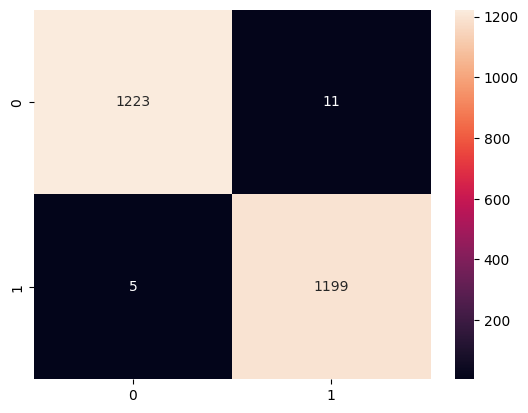

In [79]:
classes_names = ['0','1']
cm = pd.DataFrame(confusion_matrix(yTest, mlpcClf.predict(xTestTransf)), columns=classes_names, index = classes_names)
                  
sns.heatmap(cm, annot=True, fmt='d')
plt.show()